In [1]:
#carregando bibliotecas
library(psych)
library(reshape)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggplot2)

#carregando dados dos grupos
load("desempenho_teorico_e_jogo_todas_turmas_2022.RData")
#desempenho_teorico_e_jogo
load("desempenho_teorico_todas_turmas_2022.RData")
#desempenho_teorico

#carregando dados das séries temporais com clusterização
load("data_serie_classified_todas_turmas_2022.RData")
#data_serie

Warning message:
"package 'reshape' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:reshape':

    rename

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



Group,variable,value
1,TQ1,0.4464286
2,TQ1,0.4642857
3,TQ1,0.5357143
4,TQ1,0.4821429
1,TQ2,0.5357143
2,TQ2,0.2857143
3,TQ2,0.6071429
4,TQ2,0.5000000


Group,Question,value,sd,n
1,TQ1,0.4464286,0.3692322,14
2,TQ1,0.4642857,0.3904773,14
3,TQ1,0.5357143,0.3231031,14
4,TQ1,0.4821429,0.3856100,14
1,TQ2,0.5357143,0.3078640,14
2,TQ2,0.2857143,0.4258153,14
3,TQ2,0.6071429,0.4462912,14
4,TQ2,0.5000000,0.4803845,14


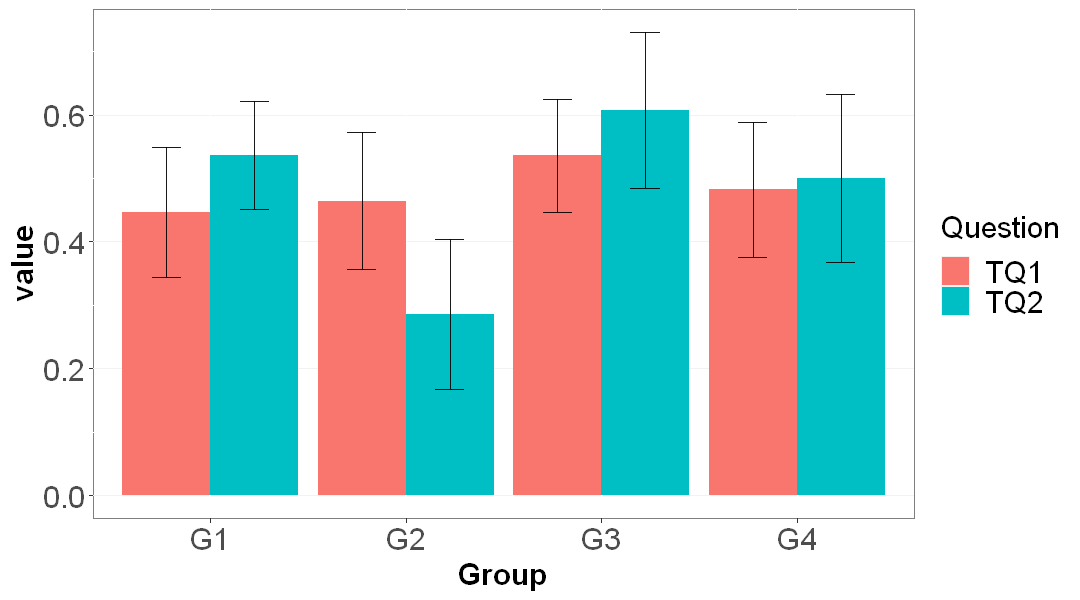

In [2]:
#gerando figura questões tq1 e tq2 para grupos

group_data <- desempenho_teorico %>% select (grp,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos)
n <- count(group_data, var = grp)
group_data <- group_data %>% group_by(grp) %>% summarise(across(everything(), list(mean,sd)))
group_data$n <- n$n
colnames(group_data) <- c("Group", "TQ1", "Q10_sd", "TQ2", "Q11_sd", "n")

group_data_melt <- melt(as.data.frame(group_data[,c('Group', 'TQ1', 'TQ2')]), id.vars = c(1))
group_data_melt

group_data_melt$sd <- group_data$Q10_sd
group_data_melt[5:8,4] <- group_data$Q11_sd
group_data_melt$n <- group_data$n
colnames(group_data_melt)[2] <- "Question"
group_data_melt

#Calculando o intervalo de confianca
alpha <- 1.680
options(repr.plot.width =9, repr.plot.height =5)

ggplot(group_data_melt, aes(fill=Question, y=value, x=Group)) + 
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("G1", "G2", "G3", "G4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18)) +
          geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=ifelse(value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)) < 0, 0, value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)


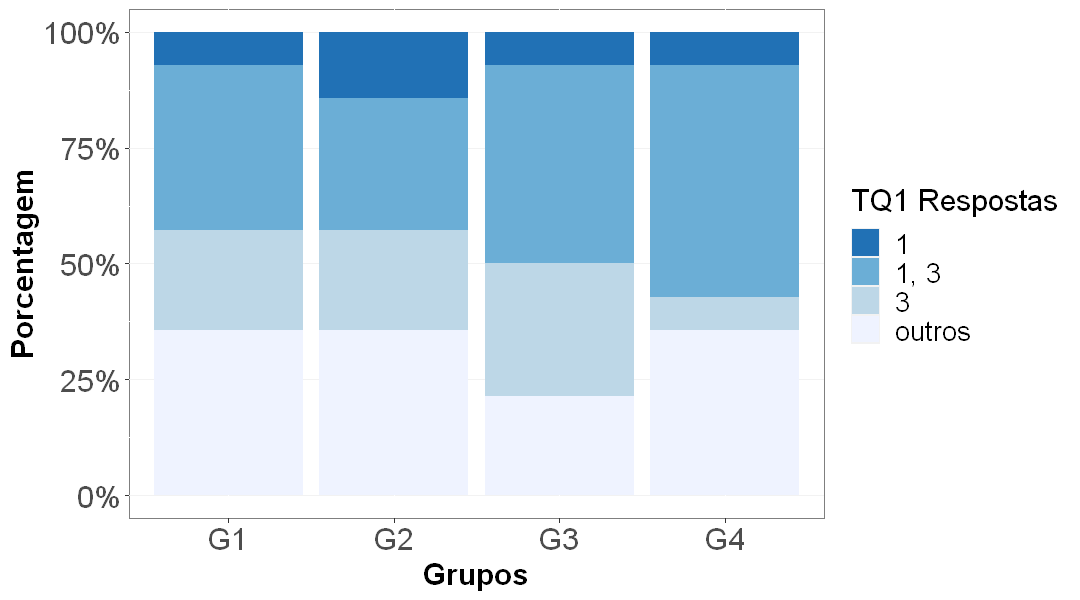

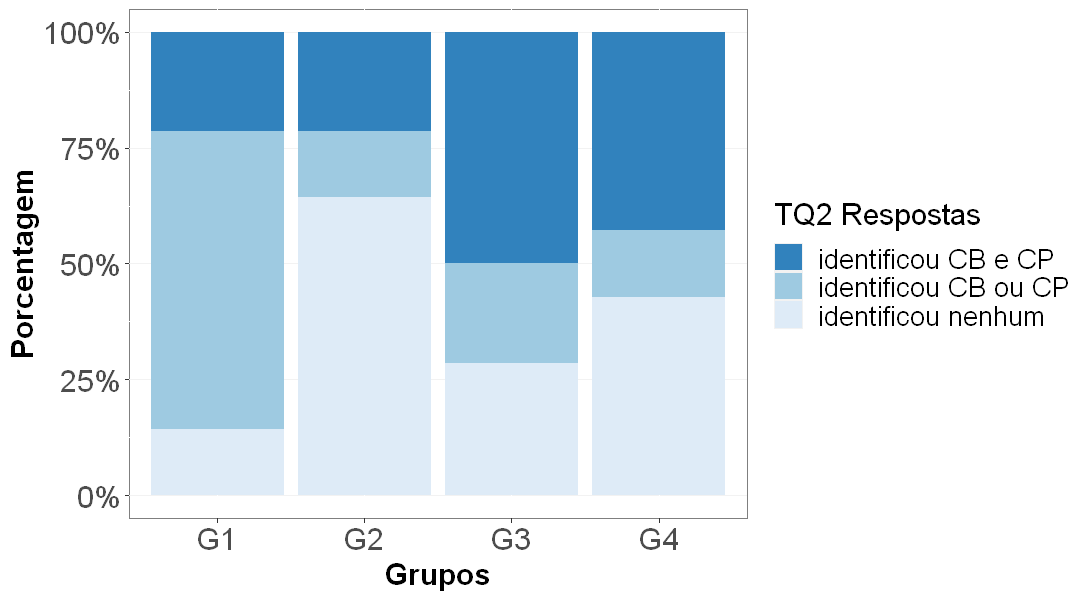

In [18]:
############ segunda versao figura questões tq1 e tq2 para grupos
dados_grupos <- desempenho_teorico %>% select (grp,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos)
colnames(dados_grupos) <- c("GRUPO", "PTOS.Q10", "PTOS.Q11")
resposta_grupo_tq1tq2 <-dados_grupos %>% group_by(GRUPO,PTOS.Q10,PTOS.Q11)# %>% summarise(n = n())
resposta_grupo_tq1tq2$PTOS.Q10 <- factor(resposta_grupo_tq1tq2$PTOS.Q10, levels = c("1", "0.75", "0.5","0"))
resposta_grupo_tq1tq2$PTOS.Q11 <- factor(resposta_grupo_tq1tq2$PTOS.Q11, levels = c("1", "0.5", "0"))

my_labels <- c('G1', 'G2', 'G3', 'G4')

ggplot(resposta_grupo_tq1tq2, aes(fill=PTOS.Q10, x=GRUPO)) + 
 #ggplot(resposta_grupo, aes(fill=value, x=GRUPO)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels=c("1", "1, 3", "3","outros")) +
    #geom_bar(position="dodge", stat="identity") +
    labs(y = "Porcentagem", x = "Grupos",fill  = "TQ1 Respostas") +
    #scale_fill_hue(labels=c("","","")) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels=my_labels) +
    #facet_wrap(~Question) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))

ggplot(resposta_grupo_tq1tq2, aes(fill=PTOS.Q11, x=GRUPO)) + 
 #ggplot(resposta_grupo, aes(fill=value, x=GRUPO)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels=c("identificou CB e CP", "identificou CB ou CP", "identificou nenhum")) +
    #geom_bar(position="dodge", stat="identity") +
    labs(y = "Porcentagem", x = "Grupos",fill  = "TQ2 Respostas") +
    #scale_fill_hue(labels=c("","","")) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels=my_labels) +
    #facet_wrap(~Question) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))

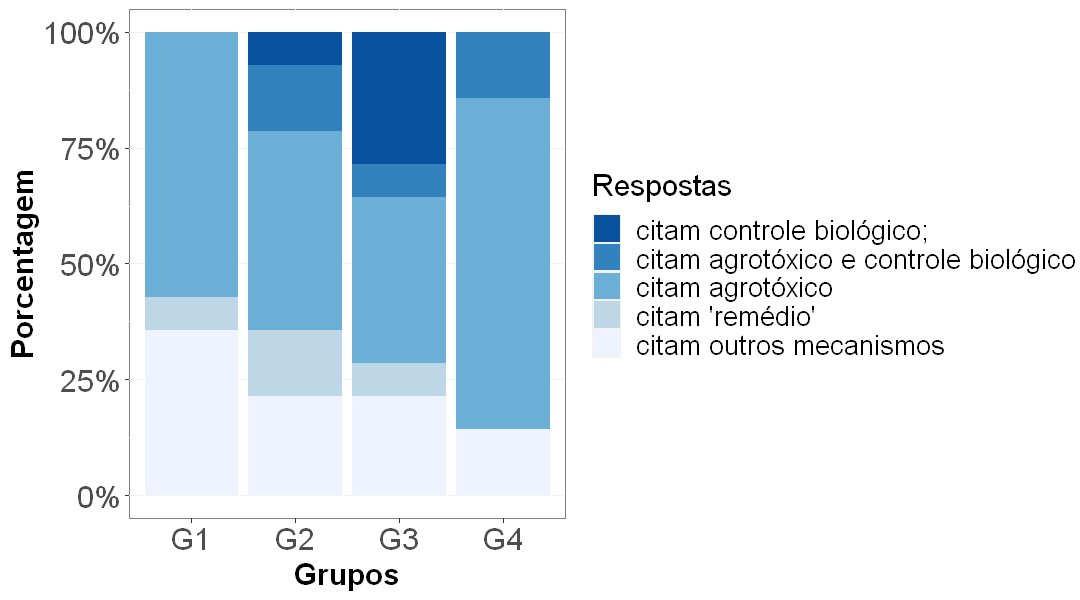

In [4]:
###### Conhecimento prévio por grupo
#desempenho_teorico %>% select(grp,idade,horas.de.jogo,horas.de.estudo) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
#desempenho_teorico %>% select(grp, conhecimento.previo) %>% group_by(grp,conhecimento.previo) %>% summarise(n = n())
#resultado <- desempenho_teorico %>% select(grp, conhecimento.previo) %>% group_by(grp,conhecimento.previo) %>% summarise(n = n())
resultado <- desempenho_teorico %>% select(grp, conhecimento.previo) %>% group_by(grp,conhecimento.previo)
#resultado
resultado$conhecimento.previo <- factor(resultado$conhecimento.previo, levels = c("C", "AC", "A", "B", "D"))
#resultado

#ggplot(resultado, aes(x = grp, y = n, fill = conhecimento.previo)) + 
#  geom_bar(stat = "identity") +
#  theme(panel.background = element_rect(fill = "white", colour = "grey50"),
#          panel.grid.major.y = element_line(colour = "#f2f2f2"),
#          axis.text=element_text(size=18),
#          axis.title=element_text(size=18,face="bold"),
#          legend.title = element_text(size=18),
#          legend.text = element_text(size=18))

#specify labels for plot
my_labels <- c('G1', 'G2', 'G3', 'G4')

ggplot(resultado, aes(x = grp, fill = conhecimento.previo)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels=c("citam controle biológico;", "citam agrotóxico e controle biológico", "citam agrotóxico","citam 'remédio'","citam outros mecanismos")) +
    labs(y = "Porcentagem", x = "Grupos",fill  = "Respostas") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
     scale_x_discrete(labels=my_labels) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))


grp,mean.form_teoria_caracteristica_desejada_q1,sd.form_teoria_caracteristica_desejada_q1,mean.form_teoria_caracteristica_desejada_q2,sd.form_teoria_caracteristica_desejada_q2,mean.form_teoria_caracteristica_desejada_q3,sd.form_teoria_caracteristica_desejada_q3,mean.form_teoria_caracteristica_desejada_q4,sd.form_teoria_caracteristica_desejada_q4
1,0.7142857,0.4688072,0.8571429,0.3631365,0.6428571,0.4972452,0.7142857,0.4688072
2,0.6428571,0.4972452,0.6428571,0.4972452,0.6428571,0.4972452,0.5714286,0.5135526
3,0.7142857,0.4688072,0.5000000,0.5188745,0.7142857,0.4688072,0.7142857,0.4688072
4,0.6428571,0.4972452,0.4285714,0.5135526,0.5000000,0.5188745,0.6428571,0.4972452


grp,variable,value,sd,n
1,mean.form_teoria_caracteristica_desejada_q1,0.7142857,0.4688072,14
2,mean.form_teoria_caracteristica_desejada_q1,0.6428571,0.4972452,14
3,mean.form_teoria_caracteristica_desejada_q1,0.7142857,0.4688072,14
4,mean.form_teoria_caracteristica_desejada_q1,0.6428571,0.4972452,14
1,mean.form_teoria_caracteristica_desejada_q2,0.8571429,0.3631365,14
2,mean.form_teoria_caracteristica_desejada_q2,0.6428571,0.4972452,14
3,mean.form_teoria_caracteristica_desejada_q2,0.5000000,0.5188745,14
4,mean.form_teoria_caracteristica_desejada_q2,0.4285714,0.5135526,14
1,mean.form_teoria_caracteristica_desejada_q3,0.6428571,0.4972452,14
2,mean.form_teoria_caracteristica_desejada_q3,0.6428571,0.4972452,14


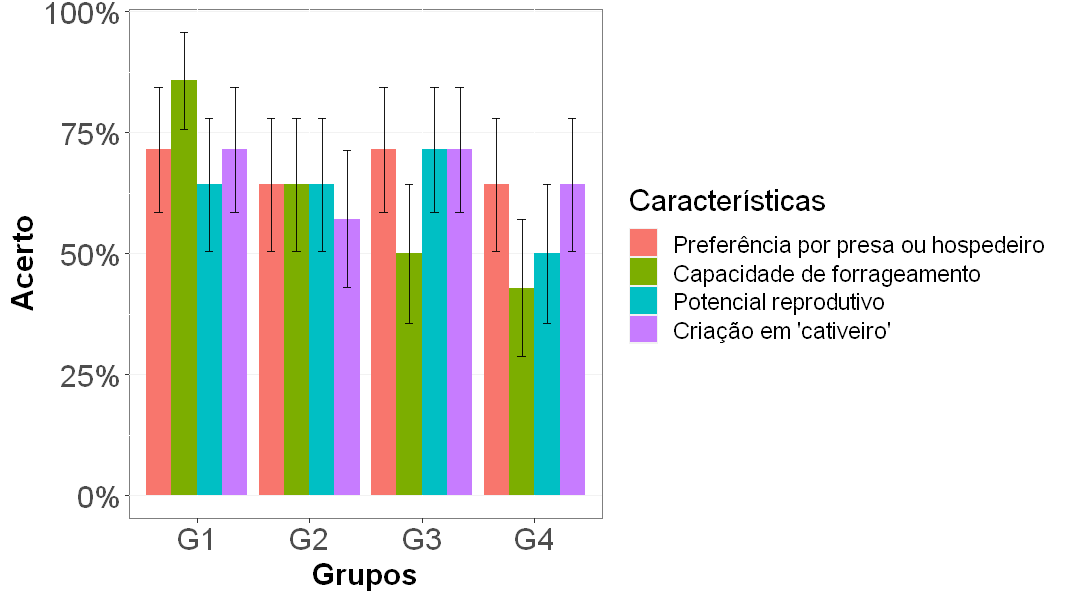

In [5]:
##############################################################
####                                                     #####
#### DESEMPENHO QUESTAO teoria_caracteristica_desejada   #####
####                                                     #####
##############################################################

#### DESEMPENHO QUESTAO teoria_caracteristica_desejada POR GRUPO
desempenho_teorico %>% select(grp,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado <- desempenho_teorico %>% select(grp,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8)]), id.vars = c(1))
resultado_melt$sd <- 0
resultado_melt[1:4,4] <- resultado[,3]
resultado_melt[5:8,4] <- resultado[,5]
resultado_melt[9:12,4] <- resultado[,7]
resultado_melt[13:16,4] <- resultado[,9]
resultado_melt$n <- group_data$n
resultado_melt

#ggplot(resultado_melt, aes(fill=variable, y=value, x=grp)) + 
#    scale_fill_discrete(labels = c("Q1", "Q2","Q3","Q4")) +
#    geom_bar(position="dodge", stat="identity") +
#    scale_x_discrete(labels = c("GRP1", "GRP2", "GRP3", "GRP4")) +
#    labs(color = "Question") +
#    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
#          panel.grid.major.y = element_line(colour = "#f2f2f2"),
#          axis.text=element_text(size=14),
#          axis.title=element_text(size=14,face="bold"),
#          legend.title = element_text(size=14),
#          legend.text = element_text(size=14)) +
#    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)


ggplot(resultado_melt, aes(fill=variable, y=value, x=grp)) + 
    scale_fill_discrete(labels = c("Preferência por presa ou hospedeiro", "Capacidade de forrageamento","Potencial reprodutivo","Criação em 'cativeiro'")) +
    geom_bar(position="dodge", stat="identity") +
    labs(y = "Acerto", x = "Grupos",fill  = "Características") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels =c("G1", "G2", "G3", "G4")) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=ifelse(value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)) < 0, 0, value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=14))

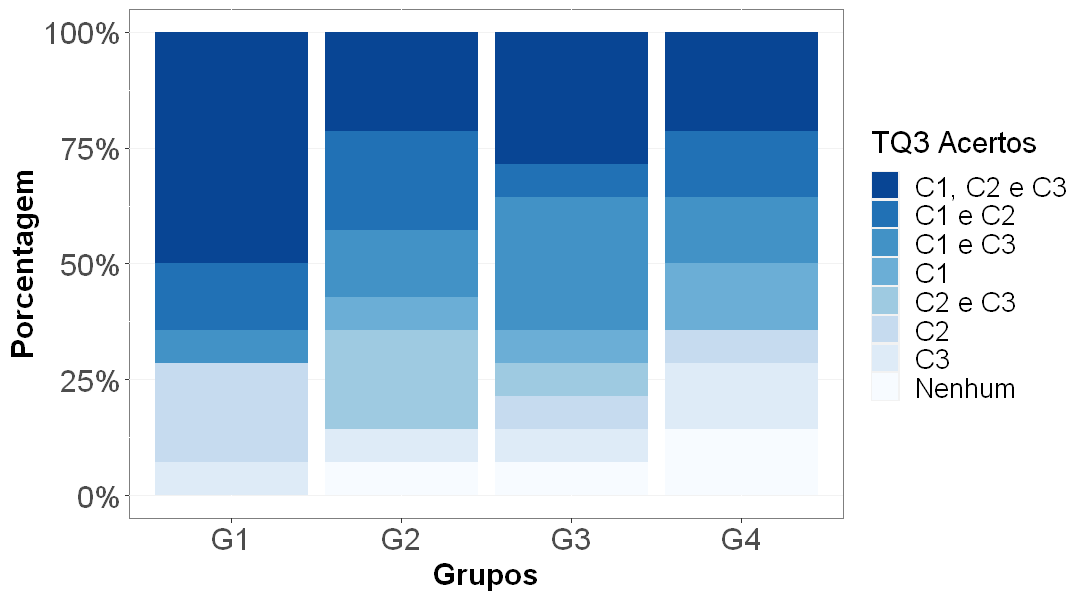

In [19]:
######### Segunda versao ##########  DESEMPENHO QUESTAO teoria_caracteristica_desejada   #####

#### DESEMPENHO QUESTAO teoria_caracteristica_desejada POR GRUPO
resultado_carac_grupos <- desempenho_teorico %>% select(grp,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(grp) #%>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
colnames(resultado_carac_grupos)[c(2,3,4,5)] <- c("C1","C2","C3","C4")
#resultado_carac_grupos$acerto <- paste(resultado_carac_grupos$C1,resultado_carac_grupos$C2,resultado_carac_grupos$C3,resultado_carac_grupos$C4)
resultado_carac_grupos$acerto <- paste(resultado_carac_grupos$C1,resultado_carac_grupos$C2,resultado_carac_grupos$C3)
resultado_carac_grupos$acerto <- factor(resultado_carac_grupos$acerto, levels = c("1 1 1", "1 1 0", "1 0 1", "1 0 0", "0 1 1", "0 1 0","0 0 1", "0 0 0"))
#resultado_carac_grupos


my_labels <- c('G1', 'G2', 'G3', 'G4')

ggplot(resultado_carac_grupos, aes(x = grp, fill = acerto)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels = c("C1, C2 e C3", "C1 e C2","C1 e C3","C1", "C2 e C3", "C2", "C3", "Nenhum")) +
    #scale_fill_discrete(labels = c("C1, C2 e C3", "C1 e C2","C1 e C3","C1", "C2 e C3", "C2", "C3", "Nenhum")) +
    labs(y = "Porcentagem", x = "Grupos",fill  = "TQ3 Acertos") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels=my_labels) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))

`summarise()` has grouped output by 'grp'. You can override using the `.groups` argument.


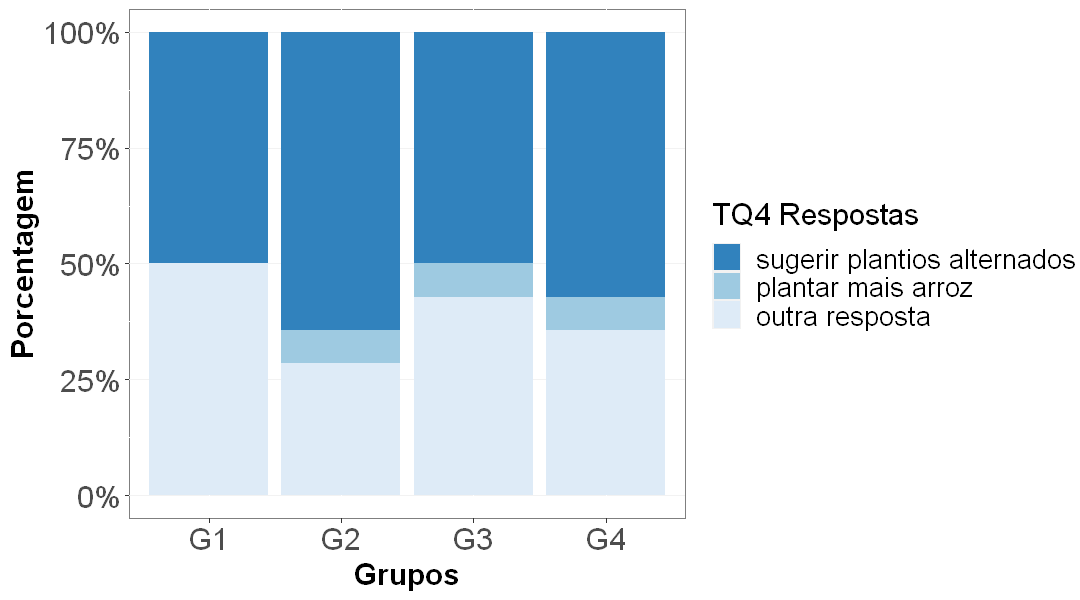

In [20]:
##############################################################
####                                                     #####
####    DESEMPENHO QUESTAO teoria_rotacao_de_cultivos    #####
####                                                     #####
##############################################################

#### DESEMPENHO QUESTAO teoria_rotacao_de_cultivos POR GRUPO
resposta_grupo <-desempenho_teorico %>% select(grp, form_teoria_rotacao_de_cultivos) %>% group_by(grp,form_teoria_rotacao_de_cultivos) %>% summarise(n = n())
#resposta_grupo

resposta_grupo <-desempenho_teorico %>% select(grp, form_teoria_rotacao_de_cultivos) %>% group_by(grp,form_teoria_rotacao_de_cultivos)# %>% summarise(n = n())
resposta_grupo[resposta_grupo$form_teoria_rotacao_de_cultivos==0,]$form_teoria_rotacao_de_cultivos <- "C"
#resposta_grupo

resposta_grupo$form_teoria_rotacao_de_cultivos <- factor(resposta_grupo$form_teoria_rotacao_de_cultivos, levels = c("B", "A", "C"))

#ggplot(resposta_grupo, aes(x = grp, y = n, fill = form_teoria_rotacao_de_cultivos)) + 
#    geom_bar(stat = "identity") +
#    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
#          panel.grid.major.y = element_line(colour = "#f2f2f2"),
#          axis.text=element_text(size=18),
#          axis.title=element_text(size=18,face="bold"),
#          legend.title = element_text(size=18),
#          legend.text = element_text(size=18))

my_labels <- c('G1', 'G2', 'G3', 'G4')

ggplot(resposta_grupo, aes(x = grp, fill = form_teoria_rotacao_de_cultivos)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels=c("B"="sugerir plantios alternados", "A"="plantar mais arroz", "C"="outra resposta")) +
    labs(y = "Porcentagem", x = "Grupos",fill  = "TQ4 Respostas") +
    #scale_fill_hue(labels=c("B"="sugerir plantios alternados", "A"="plantar mais arroz", "C"="outra resposta")) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels=my_labels) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))

In [40]:
#function for line plots
line_cluster_sep <- function(data_serie, gap, cols, title1, title2, title3, linf1, lsup1, linf2, lsup2, linf3, lsup3) {
  #separating the series
  end_serie1 <- cols
  end_serie2 <- (2*cols)-1
  end_serie3 <- (3*cols)-2
  #serie1 <- data_serie[,2:61]
  serie1 <- data_serie[,2:end_serie1]
  serie1$k <- data_serie$k
  #serie2 <- data_serie[,62:121]
  serie2 <- data_serie[,(end_serie1+1):(end_serie2)]
  serie2$k <- data_serie$k
  #serie3 <- data_serie[,122:181]
  serie3 <- data_serie[,(end_serie2+1):(end_serie3)]
  serie3$k <- data_serie$k
  
  #calculating the averages
  mean.serie1 <- as.data.frame(serie1 %>% group_by(k)%>% summarise(across(everything(), list(mean))))
  mean.serie2 <- as.data.frame(serie2 %>% group_by(k)%>% summarise(across(everything(), list(mean))))
  mean.serie3 <- as.data.frame(serie3 %>% group_by(k)%>% summarise(across(everything(), list(mean))))
  
  #end x axis
  end_x <- (cols-1)*10
  
  #data plot 1
  data_plot1 <- melt(mean.serie1, id.vars = c(1))
  data_plot1 <- data_plot1[order(data_plot1$k, data_plot1$variable),]
  #creating x axis
  data_plot1$x <- seq(from = 10, to = end_x, by = gap)
  data_plot1$k <- factor(data_plot1$k, levels = c("3", "1", "2")) # reordenando os k do pio para o melhor

  
  #data plot 2
  data_plot2 <- melt(mean.serie2, id.vars = c(1))
  data_plot2 <- data_plot2[order(data_plot2$k, data_plot2$variable),]
  #creating x axis
  data_plot2$x <- seq(from = 10, to = end_x, by = gap)
  data_plot2$k <- factor(data_plot2$k, levels = c("3", "1", "2")) # reordenando os k do pio para o melhor
    
  
  #data plot 3
  data_plot3 <- melt(mean.serie3, id.vars = c(1))
  data_plot3 <- data_plot3[order(data_plot3$k, data_plot3$variable),]
  #creating x axis
  data_plot3$x <- seq(from = 10, to = end_x, by = gap)
  data_plot3$k <- factor(data_plot3$k, levels = c("3", "1", "2")) # reordenando os k do pio para o melhor

  
  #plot
  p1 <- ggplot(data_plot1, aes(x=x, y=value, group=k)) +
    geom_hline(yintercept =  2, linetype="dashed", color = "grey80", size=.7) + 
    geom_hline(yintercept =  6, linetype="dashed", color = "grey80", size=.7) +
    scale_color_brewer(palette="Dark2",labels = c("1","2","3"))+
    geom_line(aes(color=as.factor(k)), size = 1.25) +
    #ggtitle(title1)
    #labs(title=title1,x ="Time", y = "Quantity", color = "K")+
    labs(x ="Tempo", y = "Quantidade", color = "K")+
    scale_y_continuous(limits = c(linf1, lsup1))+#, breaks = c(15,30), labels = c("20", "40")) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
        axis.line = element_line(size = 2, colour = "grey80"),
        axis.ticks.x=element_blank(),
        axis.ticks.y=element_blank(),
        axis.text=element_text(size=20),
        axis.title=element_text(size=22,face="bold"),
        legend.title= element_text(size=22,face="bold"),
        legend.text = element_text(size=20))
        #legend.position = "bottom")
  
  p2 <- ggplot(data_plot2, aes(x=x, y=value, group=k)) +
    geom_hline(yintercept =  5, linetype="dashed", color = "grey80", size=.7) + 
    geom_hline(yintercept =  10, linetype="dashed", color = "grey80", size=.7) +
    scale_color_brewer(palette="Dark2",labels = c("1","2","3"))+
    geom_line(aes(color=as.factor(k)), size = 1.25) +
    #ggtitle(title2)
    #labs(title=title2,x ="Time", y = "Quantity", color = "K")+
    labs(x ="Tempo", y = "Quantidade", color = "K")+
    scale_y_continuous(limits = c(linf2, lsup2))+#, breaks = c(15,30), labels = c("20", "40")) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          axis.line = element_line(size = 2, colour = "grey80"),
          axis.ticks.x=element_blank(),
          axis.ticks.y=element_blank(),
          axis.text=element_text(size=20),
          axis.title=element_text(size=22,face="bold"),
          legend.title= element_text(size=22,face="bold"),
          legend.text = element_text(size=20))
  
  
  p3 <- ggplot(data_plot3, aes(x=x, y=value, group=k)) +
    geom_hline(yintercept =  5, linetype="dashed", color = "grey80", size=.7) + 
    geom_hline(yintercept =  10, linetype="dashed", color = "grey80", size=.7) +
    scale_color_brewer(palette="Dark2",labels = c("1","2","3"))+
    geom_line(aes(color=as.factor(k)), size = 1.25) +
    #ggtitle(title3)
    #labs(title=title3,x ="Time", y = "Quantity", color = "K")+
    labs(x ="Tempo", y = "Quantidade", color = "K")+
    scale_y_continuous(limits = c(linf3, lsup3))+#, breaks = c(15,30), labels = c("20", "40")) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          axis.line = element_line(size = 2, colour = "grey80"),
          axis.ticks.x=element_blank(),
          axis.ticks.y=element_blank(),
          axis.text=element_text(size=20),
          axis.title=element_text(size=22,face="bold"),
          legend.title= element_text(size=22,face="bold"),
          legend.text = element_text(size=20))
  
  g = grid.arrange(p1, p2, p3, nrow=3)
  return(g)
}


# k1 = desempenho intermediario -> k2
# k2 = desempenho bom -> k3
# k3 = desempenho ruim -> k1

TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

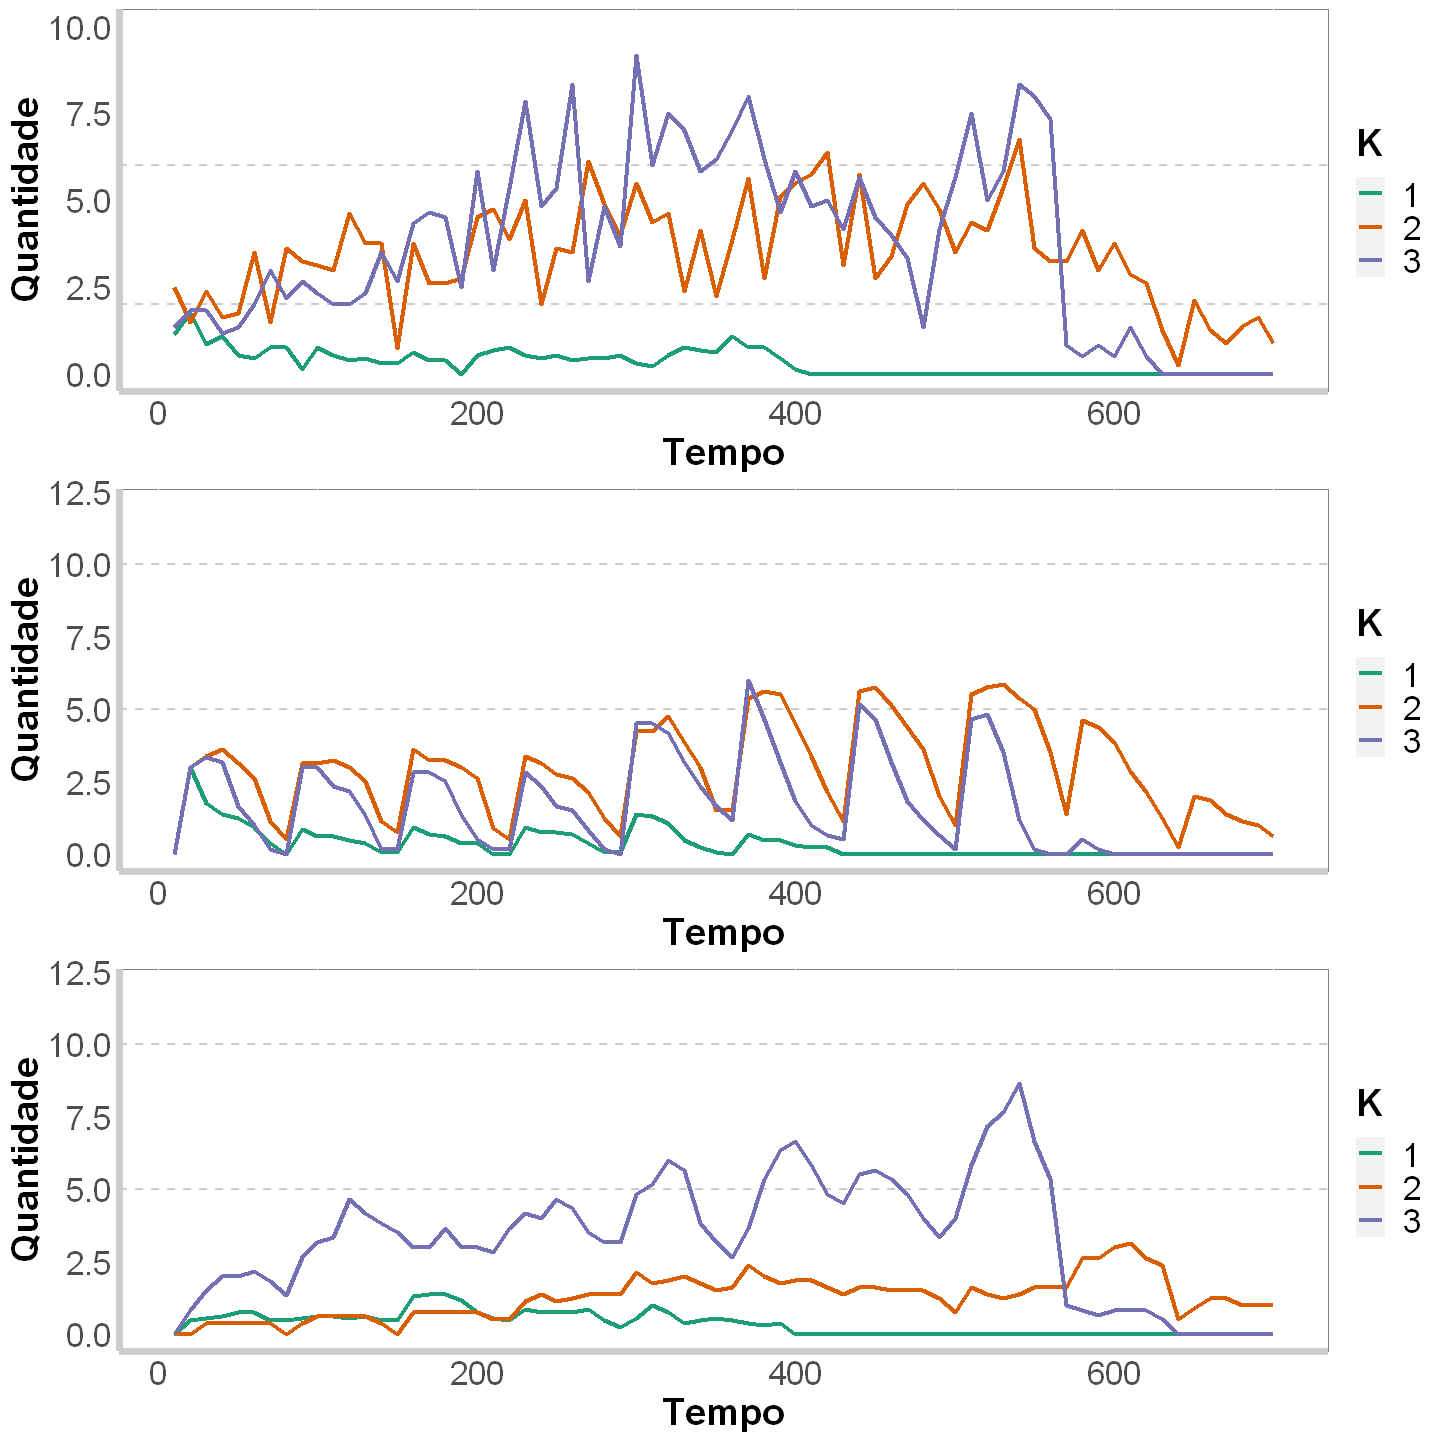

In [41]:
#Criando figura 10
options(repr.plot.width =12, repr.plot.height =12)
line_cluster_sep(data_serie, 10, 71, "Aggregate Plant series with k=3", "Aggregate Plague series with k=3", "Aggregate Predator series with k=3",0,10,0,12,0,12)

In [10]:
#gerando figura questões tq1 e tq2 para grupos classificado

resultado_grupo_k <- as.data.frame(desempenho_teorico_e_jogo[,c("grp","k","form_teoria_especies_p_manejo","form_teoria_cbXagrotóxicos")])
resultado_grupo_k <- resultado_grupo_k %>% group_by(grp,k)
n <- count(resultado_grupo_k, var = grp)
resultado_grupo_k <- resultado_grupo_k %>% summarise(across(everything(), list(mean,sd)))
resultado_grupo_k$n <- n$n
#resultado_grupo_k
colnames(resultado_grupo_k) <- c("GRP","K", "TQ1", "TQ1_sd", "TQ2", "TQ2_sd", "n")
resultado_grupo_k

#desempenho_teorico_e_jogo[order(desempenho_teorico_e_jogo$grp,desempenho_teorico_e_jogo$k),c("grp","k","form_teoria_especies_p_manejo","form_teoria_cbXagrotóxicos")]

colnames(group_data) <- c("GRP","TQ1", "TQ1_sd", "TQ2", "TQ2_sd", "n")
group_data

`summarise()` has grouped output by 'grp'. You can override using the `.groups` argument.


GRP,K,TQ1,TQ1_sd,TQ2,TQ2_sd,n
2,1,0.6666667,0.1443376,0.1666667,0.2886751,3
2,2,0.3125000,0.3750000,0.5000000,0.5773503,4
2,3,0.5416667,0.4587120,0.1666667,0.4082483,6
4,1,0.6000000,0.3354102,0.7000000,0.4472136,5
4,2,0.0000000,0.0000000,0.0000000,0.0000000,2
4,3,0.5357143,0.3933979,0.5000000,0.5000000,7


GRP,TQ1,TQ1_sd,TQ2,TQ2_sd,n
1,0.4464286,0.3692322,0.5357143,0.3078640,14
2,0.4642857,0.3904773,0.2857143,0.4258153,14
3,0.5357143,0.3231031,0.6071429,0.4462912,14
4,0.4821429,0.3856100,0.5000000,0.4803845,14


GRP,TQ1,TQ1_sd,TQ2,TQ2_sd,n
G1,0.4464286,0.3692322,0.5357143,0.3078640,14
G2K1,0.6666667,0.1443376,0.1666667,0.2886751,3
G2K2,0.3125000,0.3750000,0.5000000,0.5773503,4
G2K3,0.5416667,0.4587120,0.1666667,0.4082483,6
G3,0.5357143,0.3231031,0.6071429,0.4462912,14
G4K1,0.6000000,0.3354102,0.7000000,0.4472136,5
G4K2,0.0000000,0.0000000,0.0000000,0.0000000,2
G4K3,0.5357143,0.3933979,0.5000000,0.5000000,7


GRP,Question,value,sd,n
G1,TQ1,0.4464286,0.3692322,14
G2K1,TQ1,0.6666667,0.1443376,3
G2K2,TQ1,0.3125000,0.3750000,4
G2K3,TQ1,0.5416667,0.4587120,6
G3,TQ1,0.5357143,0.3231031,14
G4K1,TQ1,0.6000000,0.3354102,5
G4K2,TQ1,0.0000000,0.0000000,2
G4K3,TQ1,0.5357143,0.3933979,7
G1,TQ2,0.5357143,0.3078640,14
G2K1,TQ2,0.1666667,0.2886751,3


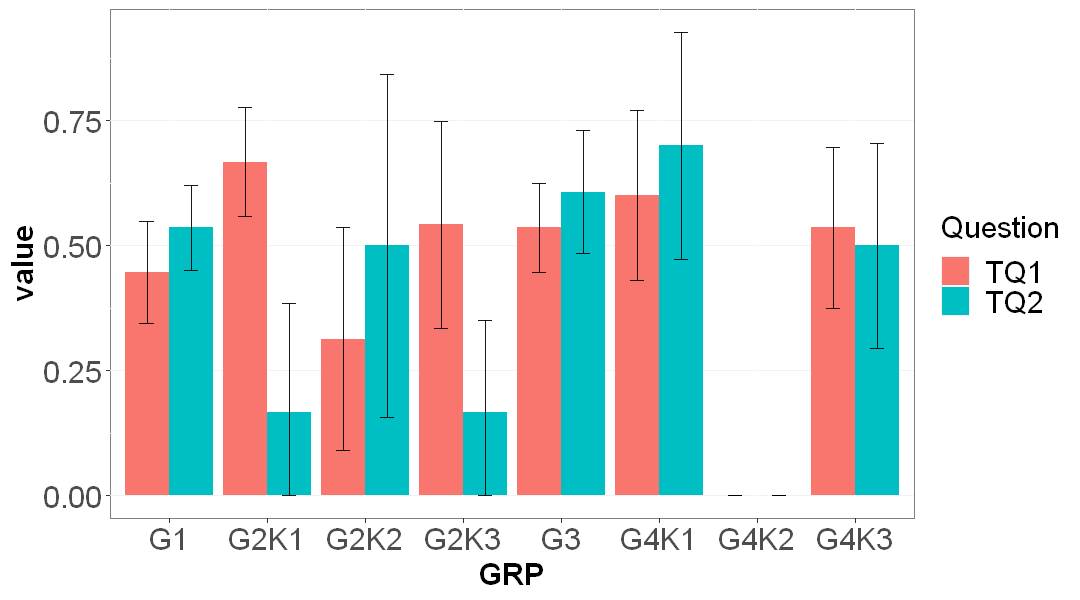

In [11]:
############### Montando tabela para gráfico do desempenho teorico com classificação

aval_groups <- data.frame(matrix(ncol = 6, nrow = 0))
names(aval_groups) <- c("GRP","TQ1", "TQ1_sd", "TQ2", "TQ2_sd", "n")

aval_groups[1,1] <- "G1"
aval_groups[1,2:6] <- group_data[1,2:6]
aval_groups[2,1] <- "G2K1"
aval_groups[2,2:6] <- resultado_grupo_k[1,3:7]
aval_groups[3,1] <- "G2K2"
aval_groups[3,2:6] <- resultado_grupo_k[2,3:7]
aval_groups[4,1] <- "G2K3"
aval_groups[4,2:6] <- resultado_grupo_k[3,3:7]
aval_groups[5,1] <- "G3"
aval_groups[5,2:6] <- group_data[3,2:6]
aval_groups[6,1] <- "G4K1"
aval_groups[6,2:6] <- resultado_grupo_k[4,3:7]
aval_groups[7,1] <- "G4K2"
aval_groups[7,2:6] <- resultado_grupo_k[5,3:7]
aval_groups[8,1] <- "G4K3"
aval_groups[8,2:6] <- resultado_grupo_k[6,3:7]
#aval_groups[2,3] <- 0
#aval_groups[2,5] <- 0

aval_groups
aval_groups_melt <- melt(as.data.frame(aval_groups[,c('GRP', 'TQ1', 'TQ2')]), id.vars = c(1))
#aval_groups_melt
aval_groups_melt$sd <- aval_groups$TQ1_sd
aval_groups_melt[9:16,4] <- aval_groups$TQ2_sd
aval_groups_melt$n <- aval_groups$n
colnames(aval_groups_melt)[2] <- "Question"
aval_groups_melt

#Calculando o intervalo de confianca
alpha <- 1.680
options(repr.plot.width =9, repr.plot.height =5)

ggplot(aval_groups_melt, aes(fill=Question, y=value, x=GRP)) + 
    geom_bar(position="dodge", stat="identity") +
    #scale_x_discrete(labels = c("G1", "G2", "G3", "G4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18)) +
          geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=ifelse(value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)) < 0, 0, value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)


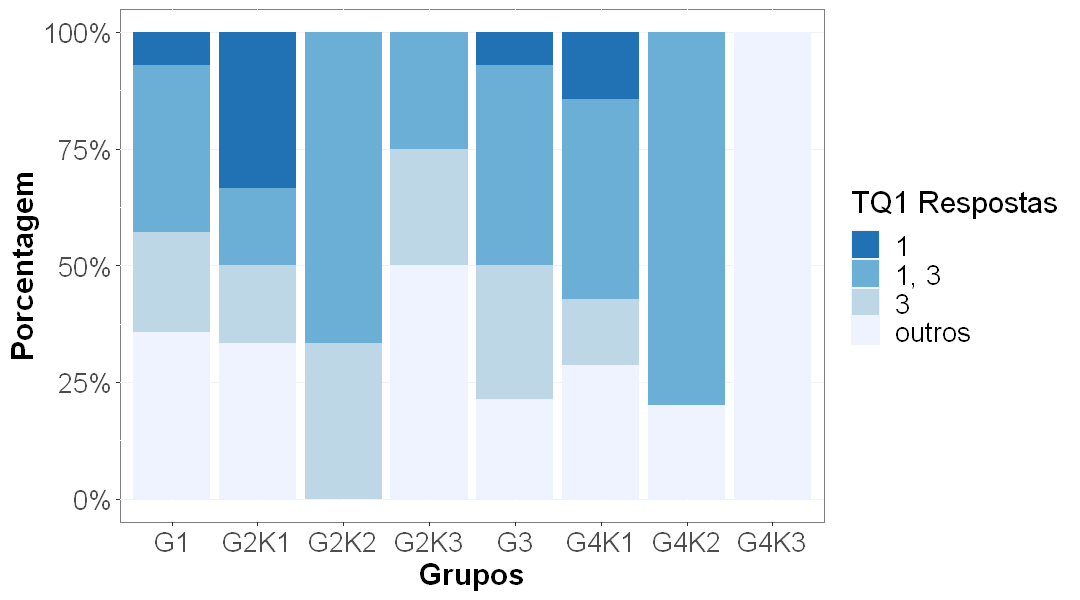

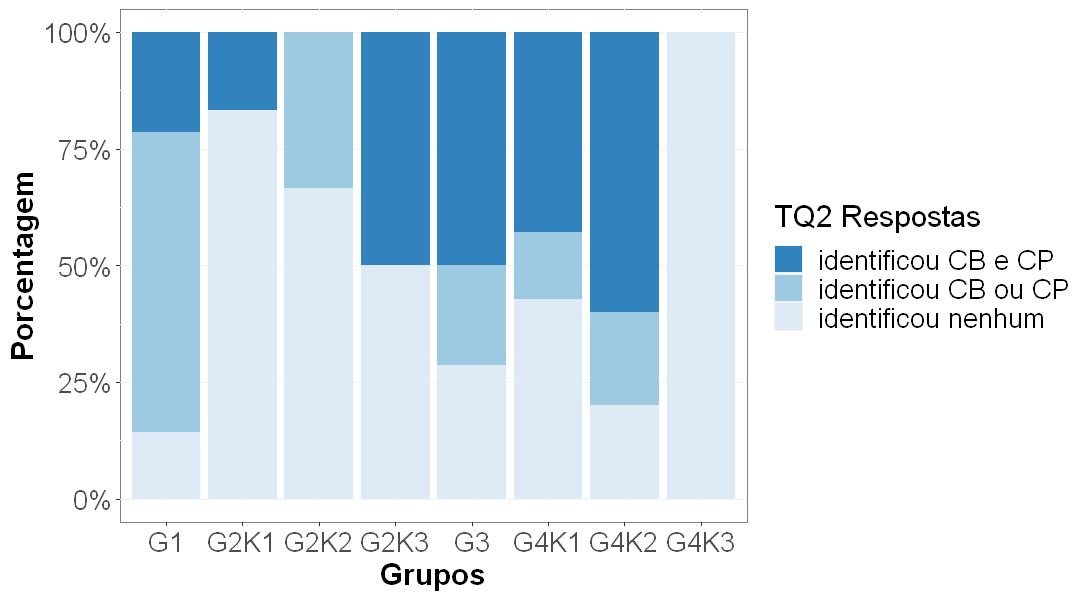

In [47]:
################ Segunda versao #gerando figura questões tq1 e tq2 para grupos classificado

aval_stats_grupos <- as.data.frame(desempenho_teorico_e_jogo[,c("grp","k","form_teoria_especies_p_manejo","form_teoria_cbXagrotóxicos")])
aval_stats_grupos$GRUPO <- paste(aval_stats_grupos$grp,aval_stats_grupos$k)
colnames(aval_stats_grupos)[c(3,4)] <- c("PTOS.Q10","PTOS.Q11")
aval_stats_grupos$PTOS.Q10 <- factor(aval_stats_grupos$PTOS.Q10, levels = c("1", "0.75", "0.5","0"))
aval_stats_grupos$PTOS.Q11 <- factor(aval_stats_grupos$PTOS.Q11, levels = c("1", "0.5", "0"))

df<-bind_rows(resposta_grupo_tq1tq2 %>% filter(GRUPO=="1"|GRUPO=="3"),aval_stats_grupos %>% filter((grp=="2"|grp=="4")&(k=="1"|k=="2"|k=="3")))

# k1 = desempenho intermediario -> k2
# k2 = desempenho bom -> k3
# k3 = desempenho ruim -> k1

#ajustando alteracao dos k
df$GRUPO <- factor(df$GRUPO, levels = c("1", "2 3", "2 1", "2 2", "3", "4 3", "4 1", "4 2"))

my_labels <- c('G1', 'G2K1', 'G2K2', 'G2K3', 'G3', 'G4K1', 'G4K2', 'G4K3')

options(repr.plot.width =9, repr.plot.height =5)

ggplot(df, aes(fill=PTOS.Q10, x=GRUPO)) + 
 #ggplot(resposta_grupo, aes(fill=value, x=GRUPO)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels=c("1", "1, 3", "3","outros")) +
    #geom_bar(position="dodge", stat="identity") +
    labs(y = "Porcentagem", x = "Grupos",fill  = "TQ1 Respostas") +
    #scale_fill_hue(labels=c("","","")) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels=my_labels) +
    #facet_wrap(~Question) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=16),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))

ggplot(df, aes(fill=PTOS.Q11, x=GRUPO)) + 
 #ggplot(resposta_grupo, aes(fill=value, x=GRUPO)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels=c("identificou CB e CP", "identificou CB ou CP", "identificou nenhum")) +
    #geom_bar(position="dodge", stat="identity") +
    labs(y = "Porcentagem", x = "Grupos",fill  = "TQ2 Respostas") +
    #scale_fill_hue(labels=c("","","")) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels=my_labels) +
    #facet_wrap(~Question) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=16),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))


In [46]:
df

GRUPO,PTOS.Q10,PTOS.Q11,grp,k
3,0.5,0,NA,NA
3,0.5,0,NA,NA
3,0,1,NA,NA
3,0,0,NA,NA
3,0.5,0.5,NA,NA
3,0.5,1,NA,NA
3,0.75,0.5,NA,NA
1,0,0,NA,NA
1,0.75,1,NA,NA
1,0,0.5,NA,NA


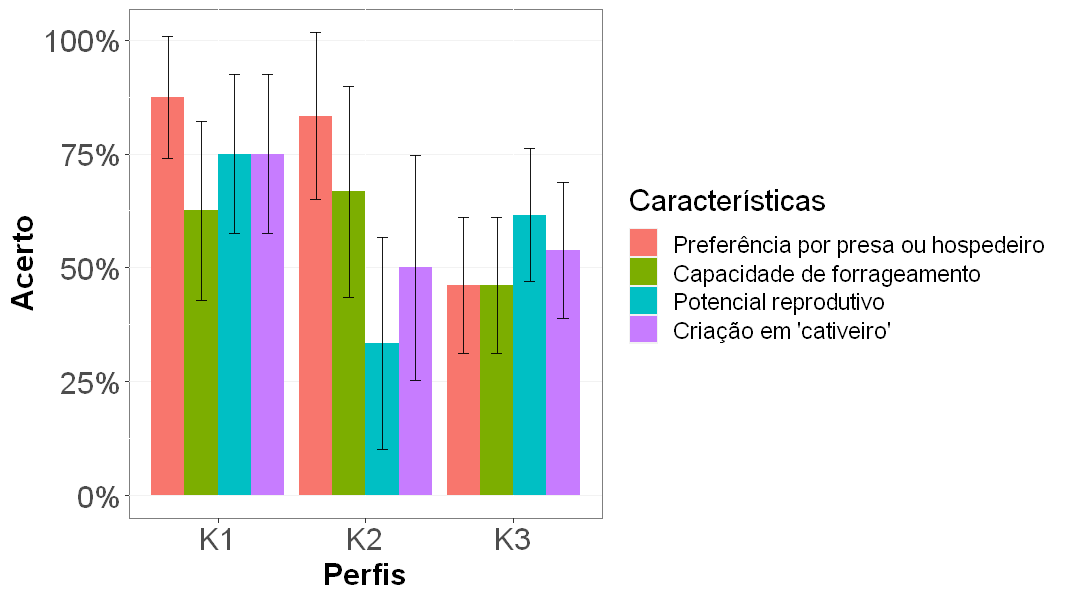

In [13]:
#### DESEMPENHO QUESTAO teoria_caracteristica_desejada POR CLASSIFICAÇÃO
#desempenho_teorico_e_jogo %>% select(k,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado<-desempenho_teorico_e_jogo %>% select(k,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8)]), id.vars = c(1))
resultado_melt$sd <- 0
#resultado_melt[1:4,4] <- resultado[,3]
#resultado_melt[5:8,4] <- resultado[,5]
#resultado_melt[9:12,4] <- resultado[,7]
#resultado_melt[13:16,4] <- resultado[,9]

resultado_melt[1:3,4] <- resultado[,3]
resultado_melt[4:6,4] <- resultado[,5]
resultado_melt[7:9,4] <- resultado[,7]
resultado_melt[10:12,4] <- resultado[,9]

resultado_melt$n <- count(desempenho_teorico_e_jogo, var = k)$n
#resultado_melt



ggplot(resultado_melt, aes(fill=variable, y=value, x=k)) + 
    scale_fill_discrete(labels = c("Preferência por presa ou hospedeiro", "Capacidade de forrageamento","Potencial reprodutivo","Criação em 'cativeiro'")) +
    geom_bar(position="dodge", stat="identity") +
    labs(y = "Acerto", x = "Perfis",fill  = "Características") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(limit =c("K1", "K2", "K3")) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=ifelse(value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)) < 0, 0, value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=14))

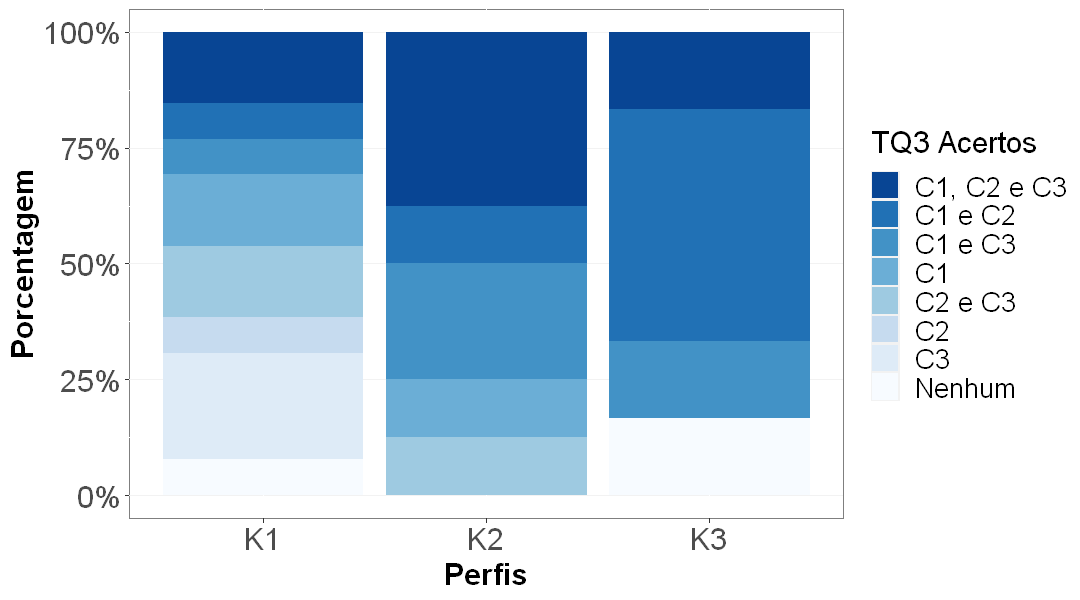

In [50]:
############ Segunda versao ## DESEMPENHO QUESTAO teoria_caracteristica_desejada POR CLASSIFICAÇÃO

resultado_carac_grupos_K<-desempenho_teorico_e_jogo %>% select(k,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(k) #%>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
colnames(resultado_carac_grupos_K)[c(2,3,4,5)] <- c("C1","C2","C3","C4")
#resultado_carac_grupos$acerto <- paste(resultado_carac_grupos$C1,resultado_carac_grupos$C2,resultado_carac_grupos$C3,resultado_carac_grupos$C4)
resultado_carac_grupos_K$acerto <- paste(resultado_carac_grupos_K$C1,resultado_carac_grupos_K$C2,resultado_carac_grupos_K$C3)
resultado_carac_grupos_K$acerto <- factor(resultado_carac_grupos_K$acerto, levels = c("1 1 1", "1 1 0", "1 0 1", "1 0 0", "0 1 1", "0 1 0","0 0 1", "0 0 0"))
#resultado_carac_grupos

# k1 = desempenho intermediario -> k2
# k2 = desempenho bom -> k3
# k3 = desempenho ruim -> k1

#ajustando alteracao dos k
resultado_carac_grupos_K$k <- factor(resultado_carac_grupos_K$k, levels = c("3", "1", "2"))


my_labels <- c('K1', 'K2', 'K3')

ggplot(resultado_carac_grupos_K, aes(x = k, fill = acerto)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels = c("C1, C2 e C3", "C1 e C2","C1 e C3","C1", "C2 e C3", "C2", "C3", "Nenhum")) +
    #scale_fill_discrete(labels = c("C1, C2 e C3", "C1 e C2","C1 e C3","C1", "C2 e C3", "C2", "C3", "Nenhum")) +
    labs(y = "Porcentagem", x = "Perfis",fill  = "TQ3 Acertos") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels=my_labels) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))

`summarise()` has grouped output by 'k'. You can override using the `.groups` argument.


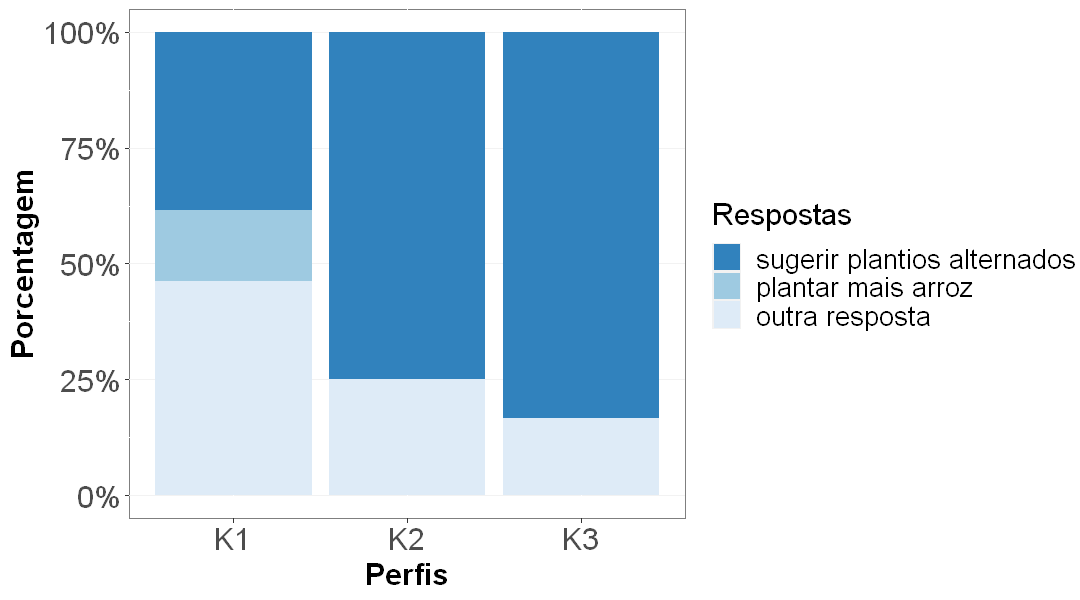

In [53]:
#### DESEMPENHO QUESTAO teoria_rotacao_de_cultivos POR CLASSIFICAÇÃO
resposta_perfil <- desempenho_teorico_e_jogo %>% select(k, form_teoria_rotacao_de_cultivos) %>% group_by(k,form_teoria_rotacao_de_cultivos) %>% summarise(n = n())
#resposta_perfil

resposta_perfil <- desempenho_teorico_e_jogo %>% select(k, form_teoria_rotacao_de_cultivos) %>% group_by(k,form_teoria_rotacao_de_cultivos) #%>% summarise(n = n())
resposta_perfil[resposta_perfil$form_teoria_rotacao_de_cultivos==0,]$form_teoria_rotacao_de_cultivos <- "C"
resposta_perfil$form_teoria_rotacao_de_cultivos <- factor(resposta_perfil$form_teoria_rotacao_de_cultivos, levels = c("B", "A", "C"))

#(i) plantar mais arroz             A
#(ii) sugerir plantios alternados.  B
#(ii) Outra resposta.               C

#ggplot(resposta_perfil, aes(x = k, y = n, fill = form_teoria_rotacao_de_cultivos)) + 
#    geom_bar(stat = "identity") +
#    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
#          panel.grid.major.y = element_line(colour = "#f2f2f2"),
#          axis.text=element_text(size=18),
#          axis.title=element_text(size=18,face="bold"),
#          legend.title = element_text(size=18),
#          legend.text = element_text(size=18))

# k1 = desempenho intermediario -> k2
# k2 = desempenho bom -> k3
# k3 = desempenho ruim -> k1

#ajustando alteracao dos k
resposta_perfil$k <- factor(resposta_perfil$k, levels = c("3", "1", "2"))

 ggplot(resposta_perfil, aes(x = k, fill = form_teoria_rotacao_de_cultivos)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels=c("B"="sugerir plantios alternados", "A"="plantar mais arroz", "C"="outra resposta")) +
    labs(y = "Porcentagem", x = "Perfis",fill  = "Respostas") +
    #scale_fill_hue(labels=c("B"="sugerir plantios alternados", "A"="plantar mais arroz", "C"="outra resposta")) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels =c("K1", "K2", "K3")) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))


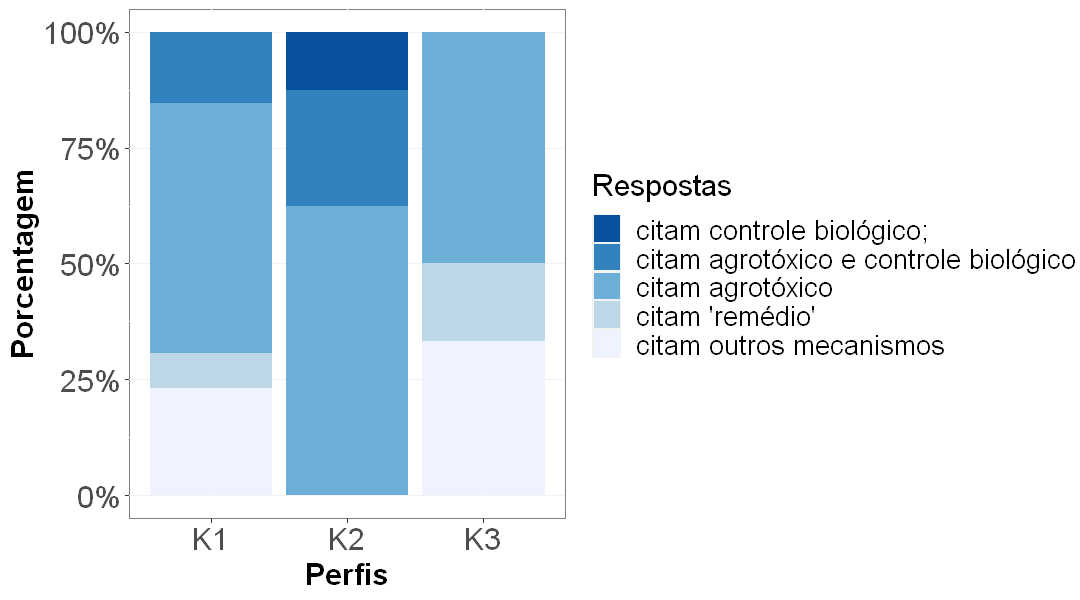

In [55]:
#### Conhecimento prévio CLASSIFICACAO DO DESEMPENHO
resultado<-desempenho_teorico_e_jogo %>% select(k, conhecimento.previo) %>% group_by(k,conhecimento.previo)

resultado$conhecimento.previo <- factor(resultado$conhecimento.previo, levels = c("C", "AC", "A", "B", "D"))
#resultado
#(A) respostas que citam agrotóxico, pesticida ou veneno;
#(B) respostas que citam “remédio”;
#(C) respostas que citam controle biológico;
#(D) respostas que citam outros mecanismos


# k1 = desempenho intermediario -> k2
# k2 = desempenho bom -> k3
# k3 = desempenho ruim -> k1

#ajustando alteracao dos k
resultado$k <- factor(resultado$k, levels = c("3", "1", "2"))


 ggplot(resultado, aes(x = k, fill = conhecimento.previo)) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Blues", direction=-1,labels=c("citam controle biológico;", "citam agrotóxico e controle biológico", "citam agrotóxico","citam 'remédio'","citam outros mecanismos")) +
    labs(y = "Porcentagem", x = "Perfis",fill  = "Respostas") +
    #scale_fill_hue(labels=c("B"="", "A"="", "C"="")) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_discrete(labels =c("K1","K2", "K3")) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=18),
          axis.title=element_text(size=18,face="bold"),
          legend.title = element_text(size=18),
          legend.text = element_text(size=16))